# Effect of $\frac{\partial c}{\partial z}$ on seismo-acoustic coupling

In [26]:
import numpy as np
import matplotlib.pyplot as plt


l=10
slope=np.linspace(0,0.02,l)#np.around(np.linspace(0,0.4,l), decimals=4)
ll=10
dz=50
depth=np.linspace(0,ll*dz,ll+1,dtype=int)
depth=depth+501


for j in range(0,ll):
    if j!=0:
        f = open('input','r')
        filedata = f.read()
        f.close()
        print('S_depth='+str(depth[j]))
        filedata = filedata.replace('S_depth='+str(depth[j-1]), 'S_depth='+str(depth[j]))
        f = open('input','w')
        f.write(filedata)
        f.close()
        
           
    for i in range(0,l):
        if i==0:
            f = open('input','r')
            filedata = f.read()
            f.close()
            filedata = filedata.replace('dcdz='+str(slope[-1]), 'dcdz='+str(slope[i]))
            f = open('input','w')
            f.write(filedata)
            f.close()
        else: 
            name='dcdz'+str(slope[i])
            f = open('input','r')
            filedata = f.read()
            f.close()
            filedata = filedata.replace('dcdz='+str(slope[i-1]), 'dcdz='+str(slope[i]))
            f = open('input','w')
            f.write(filedata)
            f.close()
        %run SA-dcdz.py
        if i==0 and j==0:
            print ('initializing results')
            results_no_norm=np.zeros([ll,l,Initial_parameters.wavenumbers],dtype=float)
            results_norm_0km=np.zeros([ll,l,Initial_parameters.wavenumbers],dtype=float)
            results_norm_1km=np.zeros([ll,l,Initial_parameters.wavenumbers],dtype=float)
            results_abs_P=np.zeros([ll,l,Initial_parameters.wavenumbers],dtype=float)
            results_real_P=np.zeros([ll,l,Initial_parameters.wavenumbers],dtype=float)

        print (Initial_parameters.Vp[-1])
        dist=Initial_parameters.r[-1]/1000
        pos1=Initial_parameters.earth_interface + int(1000/Initial_parameters.dz) 
        pos0=Initial_parameters.earth_interface

        results_no_norm[j,i,:]=20*np.log10(np.abs(P[pos0,:])/(4*pi))
        results_norm_0km[j,i,:]=20*np.log10(np.abs(P[pos0,:])/(4*pi*np.abs(P[pos0,0])))
        results_norm_1km[j,i,:]=20*np.log10(np.abs(P[pos0,:])/(4*pi*np.abs(P[pos1,0])))
        results_abs_P[j,i,:]=np.abs(P[pos0,:])
        results_real_P[j,i,:]=np.real(P[pos0,:])




reading parameters...
increasing wavenumbers...
increasing wavenumbers...
Granite
Get greens
go to range
initializing results
330.0
reading parameters...
increasing wavenumbers...
increasing wavenumbers...
Granite
Get greens
go to range
341.0
reading parameters...
increasing wavenumbers...
increasing wavenumbers...
Granite
Get greens
go to range
352.0
reading parameters...
increasing wavenumbers...
increasing wavenumbers...
Granite
Get greens
go to range
363.0
reading parameters...
increasing wavenumbers...
increasing wavenumbers...
Granite
Get greens
go to range
374.0
reading parameters...
increasing wavenumbers...
increasing wavenumbers...
Granite
Get greens
go to range
385.0
reading parameters...
increasing wavenumbers...
increasing wavenumbers...
Granite
Get greens
go to range
396.0
reading parameters...
increasing wavenumbers...
increasing wavenumbers...
Granite
Get greens
go to range
407.0
reading parameters...
increasing wavenumbers...
increasing wavenumbers...
Granite
Get green

go to range
363.0
reading parameters...
increasing wavenumbers...
increasing wavenumbers...
Granite
Get greens
go to range
374.0
reading parameters...
increasing wavenumbers...
increasing wavenumbers...
Granite
Get greens
go to range
385.0
reading parameters...
increasing wavenumbers...
increasing wavenumbers...
Granite
Get greens
go to range
396.0
reading parameters...
increasing wavenumbers...
increasing wavenumbers...
Granite
Get greens
go to range
407.0
reading parameters...
increasing wavenumbers...
increasing wavenumbers...
Granite
Get greens
go to range
418.0
reading parameters...
increasing wavenumbers...
increasing wavenumbers...
Granite
Get greens
go to range
429.0
S_depth=901
reading parameters...
increasing wavenumbers...
increasing wavenumbers...
Granite
Get greens
go to range
330.0
reading parameters...
increasing wavenumbers...
increasing wavenumbers...
Granite
Get greens
go to range
341.0
reading parameters...
increasing wavenumbers...
increasing wavenumbers...
Granite


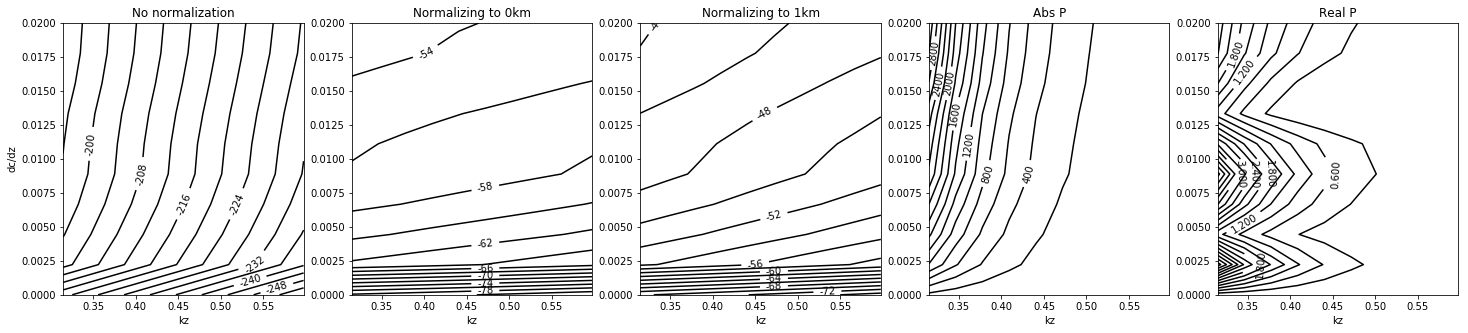

In [47]:
dist=200
dd=50
R=np.zeros([ll,l],dtype=float)

R_no_norm=np.zeros([ll,l],dtype=float)
R_norm_0km=np.zeros([ll,l],dtype=float)
R_norm_1km=np.zeros([ll,l],dtype=float)
R_abs_P=np.zeros([ll,l],dtype=float)
R_real_P=np.zeros([ll,l],dtype=float)
ind=np.where((Initial_parameters.r/1000>(dist-dd)) & (Initial_parameters.r/1000<(dist+dd)))

myfile = open('xyz.txt', 'w')


for j in range(0,ll):
    for i in range(0,l):
        R_no_norm[j,i]=np.average(results_no_norm[j,i,ind])
        myfile.write("%f %f %f\n" % (depth[j]*(2*pi*0.5/5000), slope[i], np.average(results_no_norm[j,i,ind])) )
        R_norm_0km[j,i]=np.average(results_norm_0km[j,i,ind])
        R_norm_1km[j,i]=np.average(results_norm_1km[j,i,ind])
        R_abs_P[j,i]=np.average(results_abs_P[j,i,ind])
        R_real_P[j,i]=np.average(results_real_P[j,i,ind])
myfile.close()

        
n_levels=15
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5,figsize=(25,5))
CS1=ax1.contour(depth[:ll]*(2*pi*0.5/5000),slope,np.transpose(R_no_norm), n_levels, colors='black', linestyles='-')
ax1.clabel(CS1, CS1.levels[1::2], inline=True, fontsize=10,fmt='%.0f')
ax1.set_title('No normalization')
ax1.set_xlabel('kz')
ax1.set_ylabel('dc/dz')
CS2=ax2.contour(depth[:ll]*(2*pi*0.5/5000),slope,np.transpose(R_norm_0km), n_levels, colors='black', linestyles='-')
ax2.clabel(CS2, CS2.levels[1::2], inline=True, fontsize=10,fmt='%.0f')
ax2.set_title('Normalizing to 0km')
ax2.set_xlabel('kz')
CS3=ax3.contour(depth[:ll]*(2*pi*0.5/5000),slope,np.transpose(R_norm_1km), n_levels, colors='black', linestyles='-')
ax3.clabel(CS3, CS3.levels[1::2], inline=True, fontsize=10,fmt='%.0f')
ax3.set_title('Normalizing to 1km')
ax3.set_xlabel('kz')
CS4=ax4.contour(depth[:ll]*(2*pi*0.5/5000),slope,np.transpose(R_abs_P)*1e12, n_levels, colors='black', linestyles='-')
ax4.clabel(CS4, CS4.levels[1::2], inline=True, fontsize=10,fmt='%.0f')
ax4.set_title('Abs P')
ax4.set_xlabel('kz')
CS5=ax5.contour(depth[:ll]*(2*pi*0.5/5000),slope,np.transpose(np.abs(R_real_P))*1e12, n_levels, colors='black', linestyles='-')
ax5.clabel(CS5, CS5.levels[1::2], inline=True, fontsize=10,fmt='%.3f')
ax5.set_title('Real P')
ax5.set_xlabel('kz')

plt.show()


In [28]:
R_real_P

array([[  4.42988616e-13,   2.41015795e-12,  -2.16881653e-12,
         -1.40297889e-12,   1.05247398e-11,   7.69867477e-12,
         -1.50494386e-11,   1.10876576e-12,   1.58349619e-12,
          4.78138115e-12],
       [  2.75459559e-13,   1.50898157e-12,  -1.35335610e-12,
         -8.62581181e-13,   6.70191102e-12,   4.93292978e-12,
         -9.74516054e-12,   6.97636489e-13,   1.07023603e-12,
          3.06197543e-12],
       [  1.71286366e-13,   9.44798048e-13,  -8.44381728e-13,
         -5.30172256e-13,   4.26904207e-12,   3.16283714e-12,
         -6.31443005e-12,   4.38183827e-13,   7.21679779e-13,
          1.96450723e-12],
       [  1.06509259e-13,   5.91576243e-13,  -5.26745424e-13,
         -3.25762348e-13,   2.72024195e-12,   2.02922912e-12,
         -4.09405764e-12,   2.74673240e-13,   4.85611374e-13,
          1.26281245e-12],
       [  6.62295046e-14,   3.70424084e-13,  -3.28545525e-13,
         -2.00101565e-13,   1.73392659e-12,   1.30276692e-12,
         -2.65611142e-12

In [ ]:
n_levels=20

f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))
CS=ax1.contour(depth[:ll]*(2*pi*0.5/5000),slope,np.transpose(R), n_levels, colors='black', linestyles='-')
ax1.clabel(CS, CS.levels[1::5], inline=True, fontsize=10)
ax2.contour(depth[:ll]*(2*pi*0.5/5000),slope,np.transpose(R), n_levels, colors='black', linestyles='-')
ax3.contour(depth[:ll]*(2*pi*0.5/5000),slope,np.transpose(R), n_levels, colors='black', linestyles='-')
plt.show()
# plt.figure(figsize=(15,15))
# # plt.pcolormesh(depth[:ll]*(2*pi*0.5/5000),slope,np.transpose(results))
# # plt.clim([-150,10])
# # plt.colorbar()
# CS=plt.contour(depth[:ll]*(2*pi*0.5/5000),slope,np.transpose(results), n_levels, colors='black', linestyles='-')
# plt.clabel(CS, CS.levels[1::2], inline=True, fontsize=10)
# plt.xlabel('kz')
# plt.ylabel('dc/dz')
# plt.show()

In [ ]:
plt.figure(figsize=(15,10))
plt.contour(slope,depth,results)
plt.colorbar()
plt.clim([-100,-40])
plt.show()

In [2]:
import numpy as np
ll=50
dz=20
depth=np.linspace(0,ll*dz,ll+1,dtype=int)
depth=depth+701
# kz0=depth[0]*Initial_parameters.omega/5000
# kz1=depth[-1]*Initial_parameters.omega/5000
print (depth)
# print ('kz',kz1,kz0)

[ 701  721  741  761  781  801  821  841  861  881  901  921  941  961  981
 1001 1021 1041 1061 1081 1101 1121 1141 1161 1181 1201 1221 1241 1261 1281
 1301 1321 1341 1361 1381 1401 1421 1441 1461 1481 1501 1521 1541 1561 1581
 1601 1621 1641 1661 1681 1701]


In [ ]:
l=25
slope=np.linspace(-0.2,0.02,l)#np.around(np.linspace(0,0.4,l), decimals=4)
print (slope)